In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv", sep=";")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.510500,4.309500,0.521500,32.046500,0.501750,140.249000,4.547500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.502012,4.341444,0.499662,18.145715,0.288416,35.399655,2.571002,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,2.000000,19.000000,1.000000,64.000000,1.000000,200.000000,57.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
df[df["dual_sim"] == 2] = 1

In [5]:
df["dual_sim"].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [6]:
df[df['n_cores'] == 57] = df['n_cores'].median()

In [6]:
df["n_cores"].value_counts()

4     274
7     259
8     256
2     246
5     246
3     244
1     244
6     230
57      1
Name: n_cores, dtype: int64

In [7]:
df['price_range'].unique()

array([1, 2, 3, 0])

<AxesSubplot:>

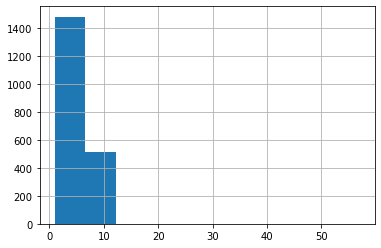

In [9]:
df['price_range'].value_counts()

1    502
2    500
0    499
3    498
4      1
Name: price_range, dtype: int64

In [11]:
df[df['price_range'] == 4] = 3

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("price_range", axis=1)
y = df['price_range']



In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_val.shape

((1600, 20), (400, 20))

In [14]:
y.value_counts()

1    502
2    500
3    499
0    499
Name: price_range, dtype: int64

In [15]:
from sklearn import tree

DesicionTree = tree.DecisionTreeClassifier()

In [16]:
DesicionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
preds = DesicionTree.predict(X_val)

[Text(0.48942010655444124, 0.96875, 'X[13] <= 2217.5\ngini = 0.75\nsamples = 1600\nvalue = [394, 410, 408, 388]'),
 Text(0.2109766744269341, 0.90625, 'X[13] <= 1052.5\ngini = 0.587\nsamples = 840\nvalue = [394, 358, 88, 0]'),
 Text(0.10386819484240688, 0.84375, 'X[11] <= 1445.0\ngini = 0.168\nsamples = 334\nvalue = [303, 31, 0, 0]'),
 Text(0.08166189111747851, 0.78125, 'X[0] <= 1815.5\ngini = 0.117\nsamples = 320\nvalue = [300, 20, 0, 0]'),
 Text(0.054441260744985676, 0.71875, 'X[16] <= 1.5\ngini = 0.062\nsamples = 280\nvalue = [271, 9, 0, 0]'),
 Text(0.04871060171919771, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.06017191977077364, 0.65625, 'X[11] <= 1233.0\ngini = 0.056\nsamples = 279\nvalue = [271, 8, 0, 0]'),
 Text(0.04011461318051576, 0.59375, 'X[12] <= 1977.0\ngini = 0.037\nsamples = 264\nvalue = [259, 5, 0, 0]'),
 Text(0.02865329512893983, 0.53125, 'X[13] <= 835.5\ngini = 0.03\nsamples = 262\nvalue = [258, 4, 0, 0]'),
 Text(0.022922636103151862, 0.46875, 

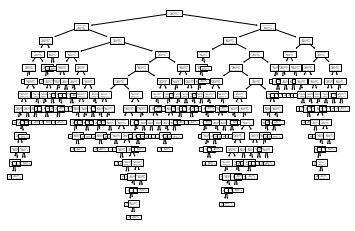

In [18]:
tree.plot_tree(DesicionTree)

In [19]:
fn = X.columns
cn= ['0', '1', '2', '3']
tree.export_graphviz(DesicionTree,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [20]:
!dot -Tpng tree.dot -o tree.png

In [25]:
from sklearn.metrics import accuracy_score, auc, f1_score
from sklearn import metrics

In [22]:
accuracy_score(y_val, preds)

0.8375

In [30]:
print(metrics.confusion_matrix(y_val, preds))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_val, preds, digits=3))

[[ 92  13   0   0]
 [  7  78   7   0]
 [  0  13  64  15]
 [  1   0   9 101]]
              precision    recall  f1-score   support

           0      0.920     0.876     0.898       105
           1      0.750     0.848     0.796        92
           2      0.800     0.696     0.744        92
           3      0.871     0.910     0.890       111

    accuracy                          0.838       400
   macro avg      0.835     0.832     0.832       400
weighted avg      0.840     0.838     0.837       400



In [33]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

DesicionTree = tree.DecisionTreeClassifier()

tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
DesicionTree = GridSearchCV(DesicionTree, tree_param, cv=5)

In [34]:
DesicionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [36]:
DesicionTree.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [40]:
DesicionTree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 15)
DesicionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [41]:
preds = DesicionTree.predict(X_val)

In [42]:
print(metrics.confusion_matrix(y_val, preds))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_val, preds, digits=3))

[[96  9  0  0]
 [ 7 78  7  0]
 [ 0 12 70 10]
 [ 0  1 13 97]]
              precision    recall  f1-score   support

           0      0.932     0.914     0.923       105
           1      0.780     0.848     0.812        92
           2      0.778     0.761     0.769        92
           3      0.907     0.874     0.890       111

    accuracy                          0.853       400
   macro avg      0.849     0.849     0.849       400
weighted avg      0.855     0.853     0.853       400



In [45]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [69]:
%time
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = RandomForest, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [72]:
RandomForest = RandomForestClassifier(n_estimators = 1800, min_samples_split = 2,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth = 80,
 bootstrap = True)

In [73]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, n_estimators=1800)

In [74]:
preds = RandomForest.predict(X_val)

In [76]:
preds

array([0, 2, 1, 3, 1, 2, 2, 0, 1, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 2, 2, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [77]:
print(metrics.confusion_matrix(y_val, preds))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_val, preds, digits=3))

[[101   4   0   0]
 [  6  79   7   0]
 [  0   5  80   7]
 [  1   0  13  97]]
              precision    recall  f1-score   support

           0      0.935     0.962     0.948       105
           1      0.898     0.859     0.878        92
           2      0.800     0.870     0.833        92
           3      0.933     0.874     0.902       111

    accuracy                          0.892       400
   macro avg      0.891     0.891     0.890       400
weighted avg      0.895     0.892     0.893       400



In [78]:
accuracy_score(y_val, preds)

0.8925